First few rows of the dataset:
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


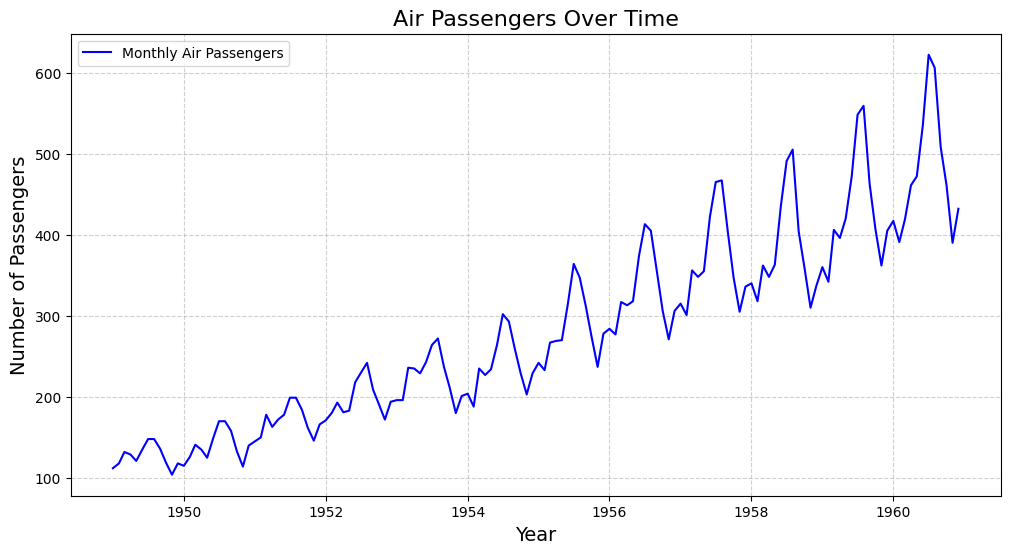

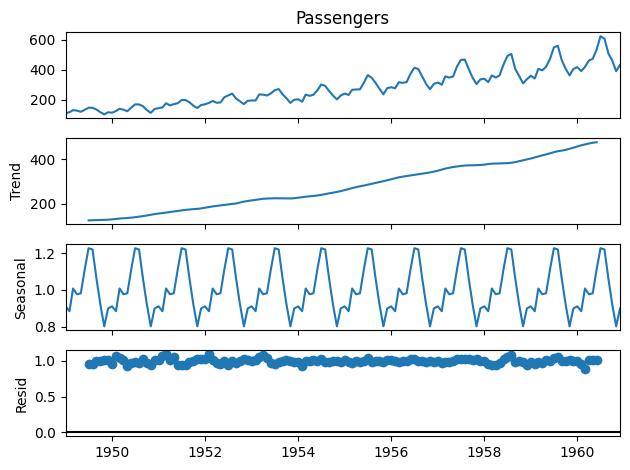

<Figure size 1200x600 with 0 Axes>

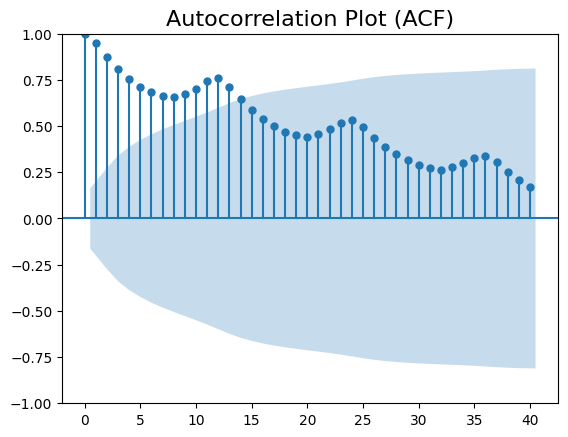

<Figure size 1200x600 with 0 Axes>

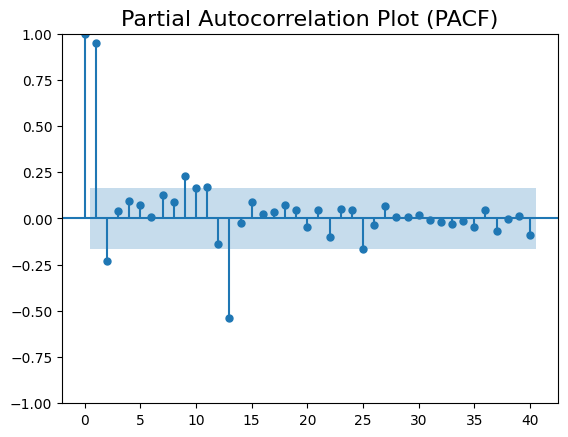

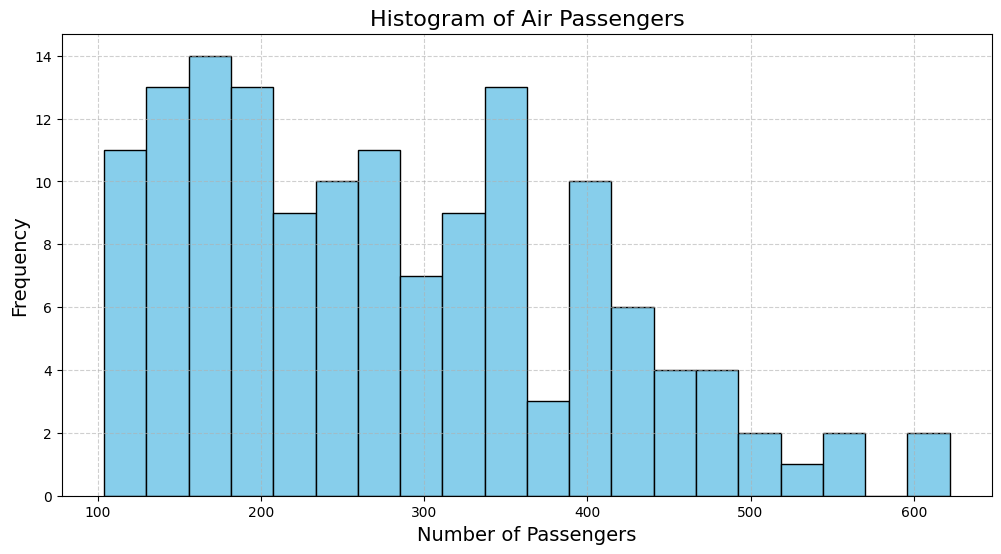

<ipython-input-7-822b10f5e192>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.index.month, y='Passengers', data=data.reset_index(), palette='coolwarm')


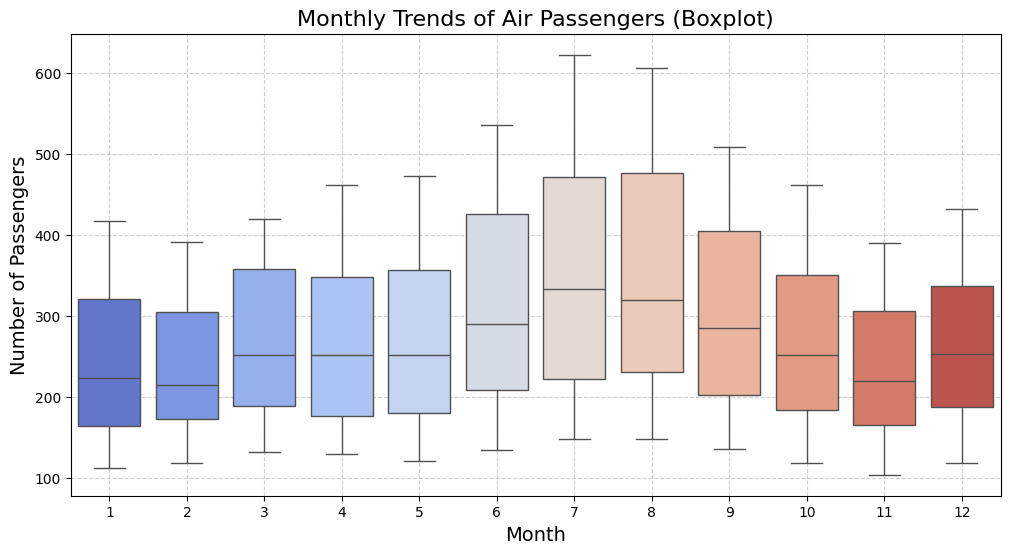

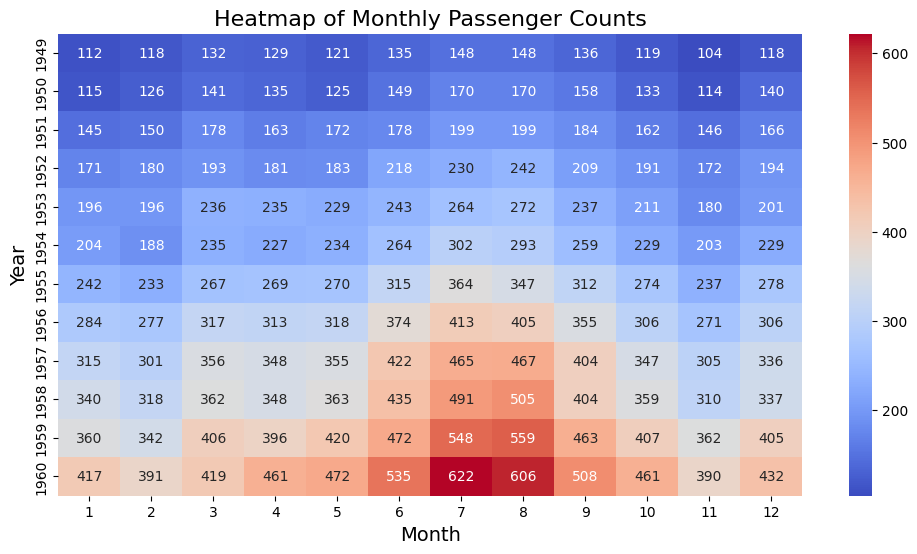

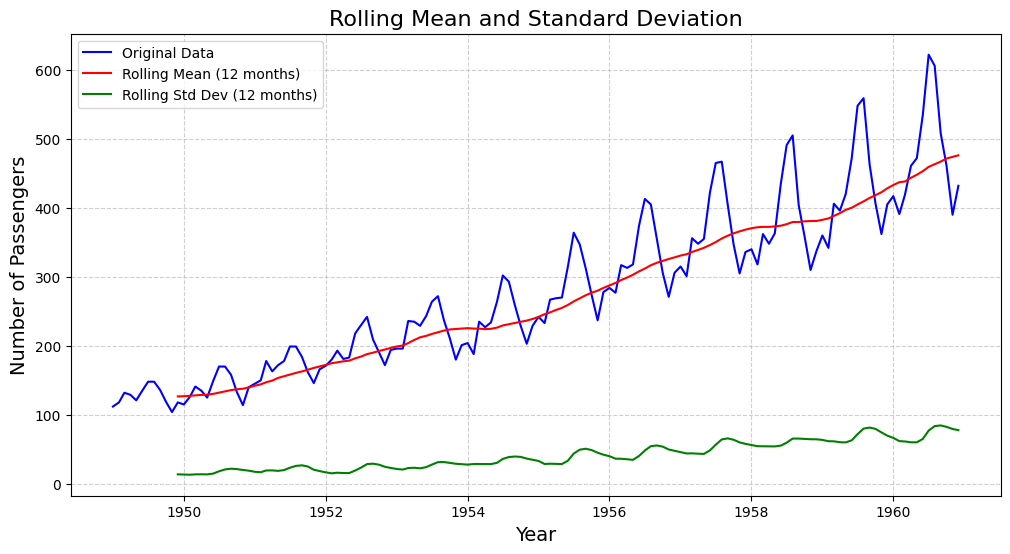

In [7]:
# Importing required libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns  # For enhanced visualizations
from statsmodels.tsa.seasonal import seasonal_decompose  # For decomposition
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For ACF and PACF plots

# Step 1: Load the dataset
# Assuming the dataset "AirPassengers.csv" is in the same directory
# The dataset has two columns: 'Month ' and '#Passengers'
data = pd.read_csv('AirPassengers.csv')

# Step 2: Display the first few rows to understand the structure of the dataset
print("First few rows of the dataset:")
print(data.head())

# Step 3: Rename columns to remove trailing spaces (if any)
data.rename(columns={"Month ": "Month", "#Passengers": "Passengers"}, inplace=True)

# Step 4: Convert 'Month' column to datetime format for proper time-series handling
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

# Step 5: Set 'Month' as the index for time series visualization
data.set_index('Month', inplace=True)

# Step 6: Line Chart - Basic Time Series Visualization
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Monthly Air Passengers', color='blue')
plt.title('Air Passengers Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Step 7: Seasonal Decomposition Plot
result = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
result.plot()
plt.show()

# Step 8: Autocorrelation Plot (ACF)
plt.figure(figsize=(12, 6))
plot_acf(data['Passengers'], lags=40)
plt.title('Autocorrelation Plot (ACF)', fontsize=16)
plt.show()

# Step 9: Partial Autocorrelation Plot (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(data['Passengers'], lags=40, method='ywm')
plt.title('Partial Autocorrelation Plot (PACF)', fontsize=16)
plt.show()

# Step 10: Histogram
plt.figure(figsize=(12, 6))
plt.hist(data['Passengers'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Air Passengers', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Step 11: Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data.index.month, y='Passengers', data=data.reset_index(), palette='coolwarm')
plt.title('Monthly Trends of Air Passengers (Boxplot)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Step 12: Heatmap
# Pivot the data for heatmap
pivot_data = data.pivot_table(values='Passengers', index=data.index.year, columns=data.index.month)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Monthly Passenger Counts', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()

# Step 13: Rolling Mean and Standard Deviation Plot
rolling_mean = data['Passengers'].rolling(window=12).mean()
rolling_std = data['Passengers'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Original Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (12 months)', color='red')
plt.plot(rolling_std, label='Rolling Std Dev (12 months)', color='green')
plt.title('Rolling Mean and Standard Deviation', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
